Goal: Explore lat/lon convention with OpenDrift

What happens when initial positions are in -180/180 but data is in 0 to 360?

Two tests were performed

1. initial positions -180 to 180
2. initial posutions 0 to 360
3. Repeat of 1.

The drift tool defaults to option 2 because all initial positions are converted to -180 to 180.

All tests use the default landmask.

In [1]:
import datetime
import os

import numpy as np
import xarray as xr

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models import oceandrift

In [2]:
import opendrift
opendrift.__version__

'1.9.0'

In [3]:
data_dir='/home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/'

In [4]:
reader = reader_netCDF_CF_generic.Reader(os.path.join(data_dir, '*.nc'))

In [5]:
reader

Reader: /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: 234.000000   xmax: 237.996994   step: 0.00700378   numx: 571
  ymin: 48.000000   ymax: 50.970001   step: 0.00450134   numy: 660
  Corners (lon, lat):
    (234.00,  50.97)  (238.00,  50.97)
    (234.00,  48.00)  (238.00,  48.00)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2023-02-17 00:00:00   end: 2023-02-24 11:30:00   step: 0:30:00
    360 times (0 missing)
Variables:
  eastward_sea_water_velocity
  northward_sea_water_velocity
  x_sea_water_velocity
  y_sea_water_velocity

# 1. Lons -180 to 180

In [6]:
lon_min=-124
lon_max=-122.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o = oceandrift.OceanDrift()
o.add_reader(reader)
o.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o.run(end_time=datetime.datetime(2023,2,19),outfile='lons180.nc')

11:24:54 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
11:24:54 DEBUG   opendrift.models.basemodel: Adding 5 config items from basemodel
11:24:54 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
11:24:54 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.9.0 / v1.0.4-2241-gef2a277)
11:24:54 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
11:24:54 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
11:24:54 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:24:54 DEBUG   opendrift.models.basemodel: Added reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:24:54 DEBUG   opendrift.models.basemodel: 
------------------------------

11:24:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:56 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:56 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:56 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:24:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:24:56 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:56 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:24:56 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:56 DEBUG   opendrift.models.basemodel:       U

11:24:56 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:56 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:56 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:56 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:56 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:56 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:24:56 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:24:56 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24:56 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:56 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:56 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11

11:24:56 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:56 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:56 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:24:56 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:    

11:24:56 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:56 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:56 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:56 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:56 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:56 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:56 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:24:56 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:24:56 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:56 INFO    opendrift.models.basemodel: 2023-02-17 05:00:00 - step 6 of 48 - 225 active elements (0 deactivated)
11:24:56 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:56 DEBUG   opendrift.models.bas

11:24:56 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:56 DEBUG   opendrift.models.basem

11:24:57 INFO    opendrift.models.basemodel: 2023-02-17 08:00:00 - step 9 of 48 - 225 active elements (0 deactivated)
11:24:57 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:57 DEBUG   opendrift.readers.b

11:24:57 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: 		225 active elements
11:24:57 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:57 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:57 DEBUG   opendrift.models.basemodel:

11:24:57 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:24:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:24:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:57 DEBUG  

11:24:57 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:24:57 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24:57 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:57 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:57 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:57 DEBUG  

11:24:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:24:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_vel

11:24:57 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:57 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:57 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:57 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:57 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:24:57 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 INFO    opendrift.models.basemodel: 2023-02-17 16:00:00 - step 17 of 48 - 225 active elements (0 deactivated)
11:24:57 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 DEBUG   opendrift.models.basemodel: -------------------

11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:24:57 DEBUG   opendrift.models.basemod

11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not neede

11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: 		225 active elements
11:24:57 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:57 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:57 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:57 DEBUG   opendrift

11:24:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:24:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:24:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:24:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:57 D

11:24:57 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:24:57 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:24:57 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24:57 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:57 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:57 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:57 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:57 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:57 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:57 DEBUG   opendrift.models.basemodel: 225 active el

11:24:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea

11:24:57 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:57 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:57 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:24:57 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 INFO    opendrift.models.basemodel: 2023-02-18 03:00:00 - step 28 of 48 - 225 active elements (0 deactivated)
11:24:57 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:57 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:24:57 DEBUG   opendrift.models.basemodel: --------------------------

11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:24:57 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------

11:24:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:24:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:57 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:24:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:24:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:57 DEBUG   opendrift.models.bas

11:24:58 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: 		225 active elements
11:24:58 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:58 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:58 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:24:58 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24

11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:24:58 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:58 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:58 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:24:58 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivi

11:24:58 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24:58 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:58 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:58 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:58 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:58 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:58 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:58 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:24:58 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:24:58 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:58 INFO    opendrift.models.basemodel: 2023-02-18 11:00:00 - step 36 of 48 - 225 acti

11:24:58 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.base

11:24:58 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:58 INFO    opendrift.models.basemodel: 2023-02-18 14:00:00 - step 39 of 48 - 225 active elements (0 deactivated)
11:24:58 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:58 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:24:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:24:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landm

11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: 		225 active elements
11:24:58 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:58 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:5

11:24:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:24:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:24:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:24:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:24:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:24:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:24:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:24:58 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:58 DEBUG   opendrift.models.basemodel:       U

11:24:58 DEBUG   opendrift.models.basemodel: 		225 active elements
11:24:58 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:24:58 DEBUG   opendrift.models.basemodel: 		-124.05999755859375 <- longitude -> -122.5
11:24:58 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:24:58 DEBUG   opendrift.models.basemodel: ---------------------------------
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:24:58 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:24:58 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:24:58 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:58 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:58 DEBUG   opendr

11:24:58 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:24:58 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:24:58 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:24:58 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:    

11:24:58 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:24:58 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:24:58 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:24:58 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:24:58 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:24:58 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:24:58 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:24:58 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:24:58 DEBUG   opendrift.models.basemodel: ======================================================================
11:24:58 INFO    opendrift.models.basemodel: 2023-02-18 22:00:00 - step 47 of 48 - 225 active elements (0 deactivated)
11:24:58 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:24:58 DEBUG   opendrift.models.ba

11:24:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:24:58 DEBUG   opendrift.models.basem

11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:upward_sea_water_velocity -> None
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:upward_sea_water_velocity -> 0
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:ocean_vertical_diffusivity -> None
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:ocean_vertical_diffusivity -> 0
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:sea_surface_wave_significant_height -> None
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:sea_surface_wave_significant_height -> 0
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:sea_surface_wave_stokes_drift_x_velocity -> None
11:24:58 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:sea_su

In [7]:
o.plot()

11:25:15 DEBUG   opendrift.readers.reader_global_landmask: Using existing GSHHS shapes..
11:25:15 DEBUG   opendrift_landmask_data.mask: mask already memmapped


(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2023-02-17 00:00 to 2023-02-19 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

# 2. Lons 0 to 360

In [8]:
lon_min=236
lon_max=237.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o2 = oceandrift.OceanDrift()
o2.add_reader(reader)
o2.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o2.run(end_time=datetime.datetime(2023,2,19),outfile='lons360.nc')

11:25:50 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
11:25:50 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
11:25:50 DEBUG   opendrift.models.basemodel: Adding 5 config items from basemodel
11:25:50 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
11:25:50 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.9.0 / v1.0.4-2241-gef2a277)
11:25:50 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
11:25:50 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
11:25:50 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:25:50 DEBUG   opendrift.models.basemodel: Added reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/cu

11:25:52 INFO    opendrift.models.basemodel: ========================
11:25:52 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:25:52 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:25:52 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:25:52 DEBUG   opendrift.models.basemodel:     land_binary_mask: nan (min) nan (max)
11:25:52 DEBUG   opendrift.models.basemodel: ---------------------------------
11:25:52 DEBUG   opendrift.models.basemodel: 		0 active elements
11:25:52 WARNING opendrift.models.basemodel: No ocean pixels nearby, cannot move elements.
11:25:52 DEBUG   opendrift.models.basemodel: to be seeded: 225, already seeded 0
11:25:52 DEBUG   opendrift.models.basemodel: Released 225 new elements.
11:25:52 DEBUG   opendrift.models.basemodel: ======================================================================
11:25:52 INFO    opendrift.models.basemodel: 2023-02-17 00:00:00 - step 1 of 48 - 225 act

11:25:52 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.55922 (min) 0.757224 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -1.03964 (min) 1.51332 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:25:52 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:25:52 DEBUG   opendrif

ValueError: Simulation stopped within first timestep. "Missing variables: ['land_binary_mask']", 'The simulation stopped before requested end time was reached.'


# 3. Repeat of -180 to 180

In [9]:
lon_min=-124
lon_max=-122.5
lat_min=48
lat_max=50

lons = np.linspace(lon_min, lon_max, num=15)
lats = np.linspace(lat_min, lat_max, num=15)

lons, lats = np.meshgrid(lons, lats)

o3 = oceandrift.OceanDrift()
o3.add_reader(reader)
o3.seed_elements(lon=lons, lat=lats, time = reader.start_time)

o3.run(end_time=datetime.datetime(2023,2,19),outfile='lons180-repeat.nc')

11:26:09 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
11:26:09 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
11:26:09 DEBUG   opendrift.models.basemodel: Adding 5 config items from basemodel
11:26:09 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
11:26:09 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.9.0 / v1.0.4-2241-gef2a277)
11:26:09 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
11:26:09 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
11:26:09 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 5 for reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc, assuming a maximum average speed of 1 m/s and time span of 0:30:00
11:26:09 DEBUG   opendrift.models.basemodel: Added reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/cu

11:26:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:11 DEBUG   opendrift.models.basemodel: Data needed for 225 elements
11:26:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:11 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:11 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-17 00:00:00 (before)
		2023-02-17 00:30:00 (after)
11:26:11 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:11 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:11 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:11 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_ve

11:26:11 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:11 DEBUG   opendrift.models.basemodel: 225 active elements (0 deactivated)
11:26:11 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:11 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:11 INFO    opendrift.models.basemodel: 2023-02-17 01:00:00 - step 2 of 48 - 225 active elements (0 deactivated)
11:26:11 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:11 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:11 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:26:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:11 DEBUG   opendrift.models.basemodel: Calli

11:26:12 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:12 DEBUG   opendrift.models.basemodel: 		-124.06347320022005 <- longitude -> -122.49608523479367
11:26:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:12 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:26:12 DEBUG   opendrift.models.basemodel: Added status stranded
11:26:12 DEBUG   opendrift.models.basemodel: 20 elements scheduled for deactivation (stranded)
11:26:12 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 

11:26:12 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

11:26:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: Data needed for 189 elements
11:26:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:12 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:12 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:26:12 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:26:

11:26:12 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:12 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:12 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:12 DEBUG   opendrift: NaN values for 102 elements, expanding data 1
11:26:12 DEBUG   opendrift: NaN values for 83 elements, expanding data 2
11:26:12 DEBUG   opendrift: NaN values for 56 elements, expanding data 3
11:26:12 DEBUG   opendrift: NaN values for 45 elements, expanding data 4
11:26:12 DEBUG   opendrift: NaN values for 43 elements, expanding data 5
11:26:12 DEBUG   opendrift: NaN values for 35 elements, expanding data 6
11:26:12 DEBUG   opendrift: NaN values for 35 elements, expanding data 7
11:26:12 DEBUG   opendrift: NaN values for 34 elements, expanding data 8
11:26:12 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:12 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:12 WARNING opendrift: Still NaN-values a

11:26:12 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-17 05:00:00 (before)
		2023-02-17 05:30:00 (after)
11:26:12 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:12 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:12 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:12 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:12 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:12 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 245x468x1) for time before (2023-02-17 05:00:00)
11:26:12 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2023-02-17 05:00:00) in space  (linearNDFast)
11:26:12 DEBUG   opendrift.readers.interpolati

11:26:12 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:12 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:12 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:12 DEBUG   opendrift.models.basemodel: 166 active elements (59 deactivated)
11:26:12 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:12 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:12 INFO    opendrift.models.basemodel: 2023-02-17 06:00:00 - step 7 of 48 - 166 active elements (59 deactivated)
11:26:12 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:12 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: Variable group ['x_s

11:26:12 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: 		166 active elements
11:26:12 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:12 DEBUG   opendrift.models.basemodel: 		-124.14055981872882 <- longitude -> -122.5
11:26:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:12 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:26:12 DEBUG   opendrift.models.basemodel: 6 elements scheduled for deactivation (stra

11:26:12 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.533436 (min) 1.32482 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:12 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency

11:26:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:12 DEBUG   opendrift.models.basemodel: Data needed for 157 elements
11:26:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:13 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:26:13 DEBUG   opendrift.models

11:26:13 DEBUG   opendrift: NaN values for 34 elements, expanding data 8
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:13 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:13 DEBUG   opendrift: NaN values for 68 elements, expanding data 1
11:26:13 DEBUG   opendrift: NaN values for 57 elements, expanding data 2
11:26:13 DEBUG   opendrift: NaN values for 50 elements, expanding data 3
11:26:13 DEBUG   opendrift: NaN values for 40 elements, expanding data 4
11:26:13 DEBUG   opendrift: NaN values for 37 elements, expanding data 5
11:26:13 DEBUG   opendrift: NaN values for 37 elements, expanding data 6
11:26:13 DEBUG   opendrift: NaN values for 36 elements, expanding data 7
11:26:13 DEBUG   opendrift: NaN values for 34 elements, expanding data 8
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:13 DEBUG   opendrift: NaN values for 31 el

11:26:13 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-17 10:00:00 (before)
		2023-02-17 10:30:00 (after)
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:13 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:13 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:13 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 232x468x1) for time before (2023-02-17 10:00:00)
11:26:13 DEBUG   opendrift.readers.basereader.structured: Interpolati

11:26:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:13 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:13 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:13 DEBUG   opendrift.models.basemodel: 141 active elements (84 deactivated)
11:26:13 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:13 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:13 INFO    opendrift.models.basemodel: 2023-02-17 11:00:00 - step 12 of 48 - 141 active elements (84 deactivated)
11:26:13 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:13 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:13 DEBUG   opendrift.models.basemodel: -----------------

11:26:13 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
11:26:13 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:13 DEBUG   opendrift.models.basemodel: 		141 active elements
11:26:13 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:13 DEBUG   opendrift.models.basemodel: 		-124.05394532147957 <- longitude -> -122.48881079771796
11:26:13 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:13 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:13 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:13 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:13 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:13 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1

11:26:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.763092 (min) 0.686469 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.738941 (min) 0.730728 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:13 DEBUG   opend

11:26:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:13 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:26:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:13 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:13 DEBUG   opendrift.models.basemodel: Data needed for 136 elements
11:26:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:13 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:13 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:13 DEBUG   opendrift.models.ba

11:26:13 DEBUG   opendrift: NaN values for 34 elements, expanding data 5
11:26:13 DEBUG   opendrift: NaN values for 33 elements, expanding data 6
11:26:13 DEBUG   opendrift: NaN values for 33 elements, expanding data 7
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:13 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:13 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:13 DEBUG   opendrift: NaN values for 70 elements, expanding data 1
11:26:13 DEBUG   opendrift: NaN values for 46 elements, expanding data 2
11:26:13 DEBUG   opendrift: NaN values for 44 elements, expanding data 3
11:26:13 DEBUG   opendrift: NaN values for 35 elements, expanding data 4
11:26:13 DEBUG   opendrift: NaN values for 34 elements, expanding data 5
11:26:13 DEBUG   opendrift: NaN values for 33 elements, expanding data 6
11:26:13 DEBUG   opendrift: NaN values for 33 el

11:26:13 DEBUG   opendrift.models.basemodel: Data needed for 129 elements
11:26:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:13 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-17 15:00:00 (before)
		2023-02-17 15:30:00 (after)
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:13 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:13 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:13 DEBUG   opendrift.readers.basereader.variables: Che

11:26:13 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
11:26:13 DEBUG   opendrift.models.basemodel: Removed 1 values from environment_profiles.
11:26:13 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:26:13 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:13 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:13 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:13 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:13 DEBUG   opendrift.models.basemodel: 128 active elements (97 deactivated)
11:26:13 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:13 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:13 INFO    opendrift.models.basemodel: 2023-02-17 16:00:00 - step 17 of 48 - 128 active element

11:26:14 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:14 DEBUG   opendrift.models.basemodel: 		128 active elements
11:26:14 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:14 DEBUG   opendrift.models.basemodel: 		-124.08379356858147 <- longitude -> -122.49444997678678
11:26:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:14 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:14 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:14 DEBU

11:26:14 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

11:26:14 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:14 DEBUG   opendrift.models.basemodel: Data needed for 127 elements
11:26:14 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:14 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:14 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:14 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:14 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:26:14 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:26:

11:26:14 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:14 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:14 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:14 DEBUG   opendrift: NaN values for 50 elements, expanding data 1
11:26:14 DEBUG   opendrift: NaN values for 46 elements, expanding data 2
11:26:14 DEBUG   opendrift: NaN values for 37 elements, expanding data 3
11:26:14 DEBUG   opendrift: NaN values for 34 elements, expanding data 4
11:26:14 DEBUG   opendrift: NaN values for 33 elements, expanding data 5
11:26:14 DEBUG   opendrift: NaN values for 33 elements, expanding data 6
11:26:14 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:14 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:14 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:14 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:14 WARNING opendrift: Still NaN-values af

11:26:14 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-17 20:00:00 (before)
		2023-02-17 20:30:00 (after)
11:26:14 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:14 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:14 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:14 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:14 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:14 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 240x468x1) for time before (2023-02-17 20:00:00)
11:26:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2023-02-17 20:00:00) in space  (linearNDFast)
11:26:14 DEBUG   opendrift.readers.interpolati

11:26:14 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:14 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:14 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:14 DEBUG   opendrift.models.basemodel: 113 active elements (112 deactivated)
11:26:14 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:14 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:14 INFO    opendrift.models.basemodel: 2023-02-17 21:00:00 - step 22 of 48 - 113 active elements (112 deactivated)
11:26:14 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:14 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:14 DEBUG   opendrift.models.basemodel: Variable group ['

11:26:14 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:14 DEBUG   opendrift.models.basemodel: 		113 active elements
11:26:14 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:14 DEBUG   opendrift.models.basemodel: 		-124.10485486151704 <- longitude -> -122.48362239311764
11:26:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:14 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:14 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:14 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:14 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:14 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:26:14 DEBUG   opendrift.models.basemodel: 1 elements scheduled for deact

11:26:14 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.861651 (min) 0.337959 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:14 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequenc

11:26:15 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Data needed for 108 elements
11:26:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:15 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:15 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:15 DEBUG   opendrift.models.bas

11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:15 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:15 DEBUG   opendrift: NaN values for 38 elements, expanding data 1
11:26:15 DEBUG   opendrift: NaN values for 36 elements, expanding data 2
11:26:15 DEBUG   opendrift: NaN values for 34 elements, expanding data 3
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 4
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 6
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:15 DEBUG   opendrift: NaN values for 31 el

11:26:15 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:15 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:15 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:15 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 239x468x1) for time before (2023-02-18 01:00:00)
11:26:15 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2023-02-18 01:00:00) in space  (linearNDFast)
11:26:15 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
11:26:15 DEBUG   opendrift: NaN values for 37 elements, expanding data 1
11:26:15 DEBUG   opendrift: NaN values for 36 elements, expanding data 2
11:26:15 DEBUG   opendrift: NaN values for 34 elements, expanding data 3
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 4
11:26:15 DEBUG   opendrift: NaN values for 32 elements,

11:26:15 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Data needed for 105 elements
11:26:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:15 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:15 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-18 02:00:00 (before)
		2023-02-18 02:30:00 (after)
11:26:15 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_v

11:26:15 DEBUG   opendrift.models.basemodel: 18 elements scheduled for deactivation (stranded)
11:26:15 DEBUG   opendrift.models.basemodel: 	(z: 0.000000 to 0.000000)
11:26:15 DEBUG   opendrift.models.basemodel: Removed 18 elements.
11:26:15 DEBUG   opendrift.models.basemodel: Removed 18 values from environment.
11:26:15 DEBUG   opendrift.models.basemodel: remove items from profile for z
11:26:15 DEBUG   opendrift.models.basemodel: remove items from profile for ocean_vertical_diffusivity
11:26:15 DEBUG   opendrift.models.basemodel: Removed 18 values from environment_profiles.
11:26:15 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:26:15 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:15 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:15 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:15 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no r

11:26:15 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:26:15 DEBUG   opendrift.models.basemode

11:26:15 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:26:15 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:26:15 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:26:15 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:26:15 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -1.44485 (min) 0.420496 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -1.28272 (min) 0.626942 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:15 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:15 

11:26:15 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:15 DEBUG   opendrift.models.basemodel: Data needed for 87 elements
11:26:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:15 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:15 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:15 DEBUG   opendrift.models.base

11:26:15 DEBUG   opendrift: NaN values for 35 elements, expanding data 3
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 4
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 6
11:26:15 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:15 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:15 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:15 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
11:26:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:15 DEBUG   opendrift.readers.basereader.variables: Masking 2 elements outside coverage
11:26:15 DEBUG   open

11:26:16 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2023-02-18 07:00:00) in space  (linearNDFast)
11:26:16 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
11:26:16 DEBUG   opendrift: NaN values for 38 elements, expanding data 1
11:26:16 DEBUG   opendrift: NaN values for 38 elements, expanding data 2
11:26:16 DEBUG   opendrift: NaN values for 35 elements, expanding data 3
11:26:16 DEBUG   opendrift: NaN values for 33 elements, expanding data 4
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 6
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:16 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:16 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:16 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:16 WARNING opendrift: Still NaN-values after 10 i

11:26:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:26:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: Data needed for 86 elements
11:26:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:16 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:16 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-18 08:00:00 (before)
		2023-02-18 08:30:00 (after)
11

11:26:16 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:26:16 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:26:16 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:16 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:16 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:16 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:16 DEBUG   opendrift.models.basemodel: 86 active elements (139 deactivated)
11:26:16 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:16 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:16 INFO    opendrift.models.basemodel: 2023-02-18 09:00:00 - step 34 of 48 - 86 active elements (139 deactivated)
11:26:16 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:16 DEBUG   opendrift.models.

11:26:16 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: 		86 active elements
11:26:16 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:16 DEBUG   opendrift.models.basemodel: 		-124.21841659593328 <- longitude -> -122.49382586014121
11:26:16 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:16 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:16 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:16 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:16 DEBUG   open

11:26:16 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:26:16 DEBUG   opendrift.models.base

11:26:16 DEBUG   opendrift.models.basemodel: Data needed for 85 elements
11:26:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:16 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
11:26:16 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
11:26:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:26:16 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:26:16 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:26:16 DEBUG   opendrift.models.basemodel: Creating em

11:26:16 DEBUG   opendrift: NaN values for 33 elements, expanding data 7
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 8
11:26:16 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:16 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:16 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:16 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
11:26:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:16 DEBUG   opendrift.readers.basereader.variables: Masking 2 elements outside coverage
11:26:16 DEBUG   opendrift.models.basemodel: Data missing for 32 elements.
11:26:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:16 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:26:16 DEBUG   opendrift.models.basemodel: --------------------------

11:26:16 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:16 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 244x468x1) for time before (2023-02-18 13:00:00)
11:26:16 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2023-02-18 13:00:00) in space  (linearNDFast)
11:26:16 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
11:26:16 DEBUG   opendrift: NaN values for 39 elements, expanding data 1
11:26:16 DEBUG   opendrift: NaN values for 37 elements, expanding data 2
11:26:16 DEBUG   opendrift: NaN values for 34 elements, expanding data 3
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 4
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 6
11:26:16 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:16 DEBUG   opendrift: NaN values

11:26:17 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:17 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Data needed for 82 elements
11:26:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:17 DEBUG   opendrift.readers.basereader.structur

11:26:17 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:17 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:26:17 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:26:17 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:26:17 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:17 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:17 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:17 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
11:26:17 DEBUG   opendrift.models.basemodel: 82 active elements (143 deactivated)
11:26:17 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 225
11:26:17 DEBUG   opendrift.models.basemodel: ==============================================================

11:26:17 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: 		82 active elements
11:26:17 DEBUG   opendrift.models.basemodel: 		47.979999542236335 <- latitude  -> 50.09000015258789
11:26:17 DEBUG   opendrift.models.basemodel: 		-124.15224927634362 <- longitude -> -122.5
11:26:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
11:26:17 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:17 DEBUG   opendrift.models.physics_methods: Calcula

11:26:17 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:17 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 

11:26:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:17 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
11:26:17 DEBUG   opendrift.models.basemodel: ---------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
11:26:17 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_sea_water_velocity for 32 elements
11:26:17 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_sea_water_velocity for 32 elements
11:26:17 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
11:26:17 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:26:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:26:17 DEBUG   opendrift.models.basemodel:     x_sea_water

11:26:17 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
11:26:17 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
11:26:17 DEBUG   opendrift.readers.basereader.variables: Masking 2 elements outside coverage
11:26:17 DEBUG   opendrift.models.basemodel: Data missing for 32 elements.
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Data needed for 82 elements
11:26:17 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
11:26:17 DEBUG   open

11:26:17 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
11:26:17 DEBUG   opendrift: NaN values for 37 elements, expanding data 1
11:26:17 DEBUG   opendrift: NaN values for 36 elements, expanding data 2
11:26:17 DEBUG   opendrift: NaN values for 33 elements, expanding data 3
11:26:17 DEBUG   opendrift: NaN values for 32 elements, expanding data 4
11:26:17 DEBUG   opendrift: NaN values for 32 elements, expanding data 5
11:26:17 DEBUG   opendrift: NaN values for 32 elements, expanding data 6
11:26:17 DEBUG   opendrift: NaN values for 32 elements, expanding data 7
11:26:17 DEBUG   opendrift: NaN values for 31 elements, expanding data 8
11:26:17 DEBUG   opendrift: NaN values for 31 elements, expanding data 9
11:26:17 DEBUG   opendrift: NaN values for 31 elements, expanding data 10
11:26:17 WARNING opendrift: Still NaN-values after 10 iterations, exiting!
11:26:17 DEBUG   opendrift: NaN values for 37 elements, expanding data 1
11:26:17 DEBUG   opendrift: NaN v

11:26:17 DEBUG   opendrift.readers.basereader.structured: Modulating longitudes to 0-360 for self.name
11:26:17 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2023-02-18 20:00:00 (before)
		2023-02-18 20:30:00 (after)
11:26:17 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using eastward_sea_water_velocity to retrieve x_sea_water_velocity
11:26:17 DEBUG   opendrift.readers.reader_netCDF_CF_generic: Using northward_sea_water_velocity to retrieve y_sea_water_velocity
11:26:17 DEBUG   opendrift.readers.reader_netCDF_CF_generic: North is up, no rotation necessary
11:26:17 DEBUG   opendrift.readers.basereader.variables: Checking x_sea_water_velocity for invalid values
11:26:17 DEBUG   opendrift.readers.basereader.variables: Checking y_sea_water_velocity for invalid values
11:26:17 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 252x468x1) for time before (2023-02-18 20:00:00)
11:26:17 DEBUG   opendrift.readers.basereader.structured: Interpolati

11:26:17 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:17 INFO    opendrift.models.basemodel: 2023-02-18 21:00:00 - step 46 of 48 - 81 active elements (144 deactivated)
11:26:17 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
11:26:17 DEBUG   opendrift.models.basemodel: ======================================================================
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Variable group ['x_sea_water_velocity', 'y_sea_water_velocity']
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/gpsc-jeh326/projects/stokes_drift/input_data/SalishSea/currents/*.nc
11:26:17 DEBUG   opendrift.models.basemodel: ----------------------------------------
11:26:17 DEBUG   opendrift.models.basemodel: Data needed for 81

11:26:18 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:18 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
11:26:18 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
11:26:18 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
11:26:18 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
11:26:18 DEBUG   opendrift.models.basemodel: No elements to deactivate
11:26:18 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
11:26:18 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
11:26:18 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
11:26:18 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
11:26:18 DEBUG   opendrift.models.basemodel: Horizontal diffusivity i

11:26:18 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel: ---------------------------------
11:26:18 DEBUG   opendrift.models.basemodel: 		81 active elements
11:26:18 DEBUG   opendrift.models.basemodel: 		4

11:26:18 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
11:26:18 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
11:26:18 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: -0.727227 (min) 0.357245 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: -0.301879 (min) 0.255304 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
11:26:18 DEBUG   opendrift.models.basemodel:     sea_s

11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: seed:wind_drift_factor -> 0.02
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: seed:current_drift_factor -> 1
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: seed:terminal_velocity -> 0.0
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:x_sea_water_velocity -> None
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:x_sea_water_velocity -> 0
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:y_sea_water_velocity -> None
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:y_sea_water_velocity -> 0
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:constant:x_wind -> None
11:26:18 DEBUG   opendrift.export.io_netcdf: Setting imported config: environment:fallback:x_wind -> 0
11:26:18 DEBUG 

11:26:45 DEBUG   opendrift.readers.reader_global_landmask: Using existing GSHHS shapes..
11:26:45 DEBUG   opendrift_landmask_data.mask: mask already memmapped


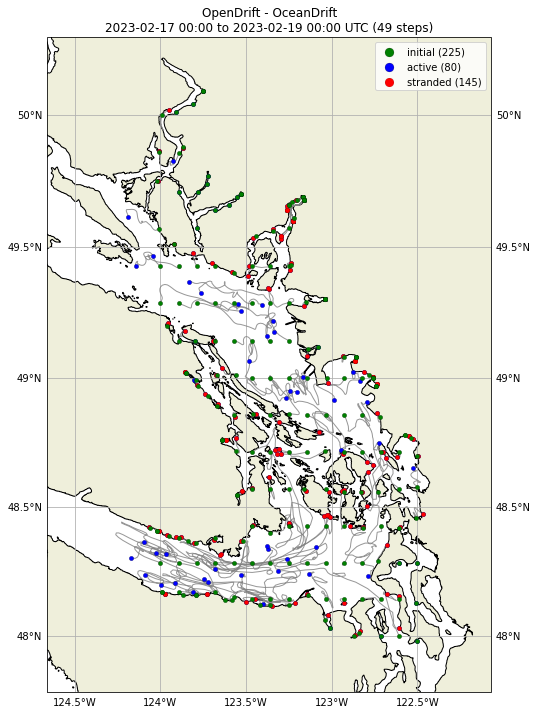

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2023-02-17 00:00 to 2023-02-19 00:00 UTC (49 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [10]:
o3.plot()

# Summary

## 1. Lons -180 to 180
* Fails - all velocities 0

## 2. Lons 0 to 360
* Fails - Missing variable land_binary_mask

The drift tool doesn't actually use this option because all lons are convereted to -180 to 180

## 3. Lons -180 to 180 repeat
* Succeeds!

# Conclusion
This is very, very strange. Upon multiple repeats, the -180 to 180 case succeeds only if a different simulation was completed first. In other words, it repetedly fails on the first try, but succeeds on the second try!

# Next steps
Does this behaviour repreat if OpenDrift is updated??